In [1]:
import numpy as np
# Qiskit imports:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

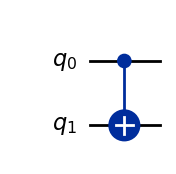

In [2]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
# Return a drawing of the circuit
qc.draw("mpl")

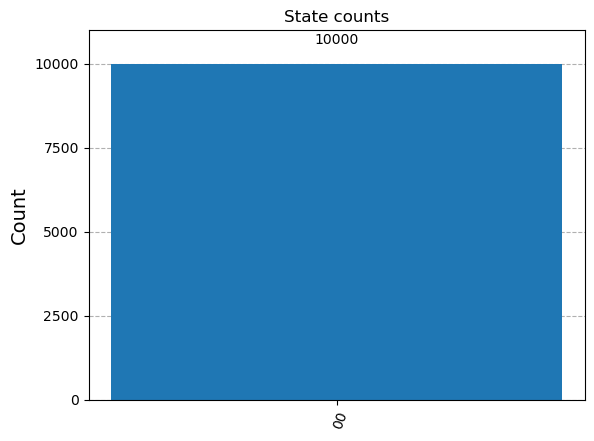

In [3]:
# setup to measure all the qubits on the output
qc.measure_all()
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)
# Run and get counts in a histogram
result = simulator.run(qc, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

In [13]:
#Question1

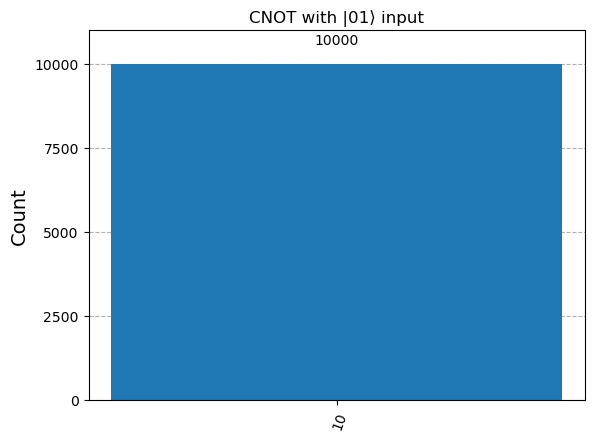

In [5]:
# Testing |01⟩ as input (apply X to qubit 1)
qc1 = QuantumCircuit(2)
qc1.x(1)  # Apply X gate to qubit 1 to prepare |01⟩
qc1.cx(0, 1)  # Apply CNOT
qc1.measure_all()
simulator = AerSimulator()
qc1 = transpile(qc1, simulator)
result1 = simulator.run(qc1, shots=10000).result()
counts1 = result1.get_counts(qc1)
plot_histogram(counts1, title='CNOT with |01⟩ input')

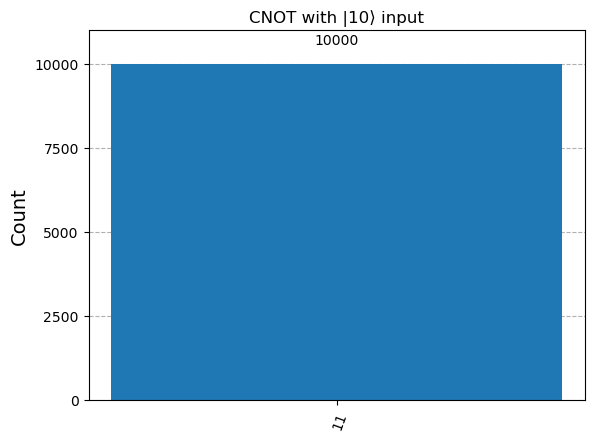

In [6]:
# Testing |10⟩ as input (apply X to qubit 0)
qc2 = QuantumCircuit(2)
qc2.x(0)  # Apply X gate to qubit 0 to prepare |10⟩
qc2.cx(0, 1)  # Apply CNOT
qc2.measure_all()
qc2 = transpile(qc2, simulator)
result2 = simulator.run(qc2, shots=10000).result()
counts2 = result2.get_counts(qc2)
plot_histogram(counts2, title='CNOT with |10⟩ input')

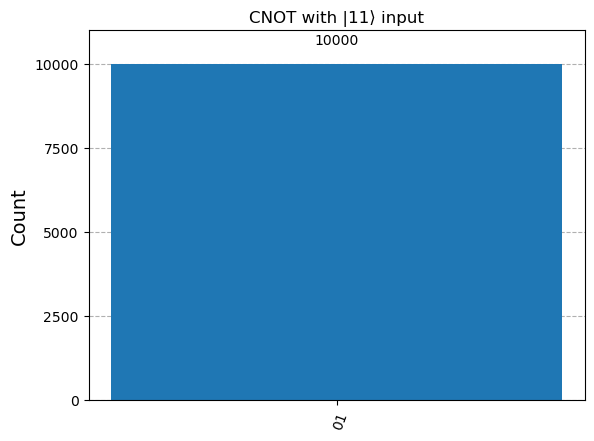

In [7]:
# Testing |11⟩ as input (apply X to both qubits)
qc3 = QuantumCircuit(2)
qc3.x(0)  # Apply X gate to qubit 0
qc3.x(1)  # Apply X gate to qubit 1 to prepare |11⟩
qc3.cx(0, 1)  # Apply CNOT
qc3.measure_all()
qc3 = transpile(qc3, simulator)
result3 = simulator.run(qc3, shots=10000).result()
counts3 = result3.get_counts(qc3)
plot_histogram(counts3, title='CNOT with |11⟩ input')

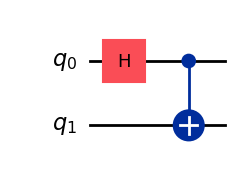

In [8]:
#Bell State
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw("mpl")

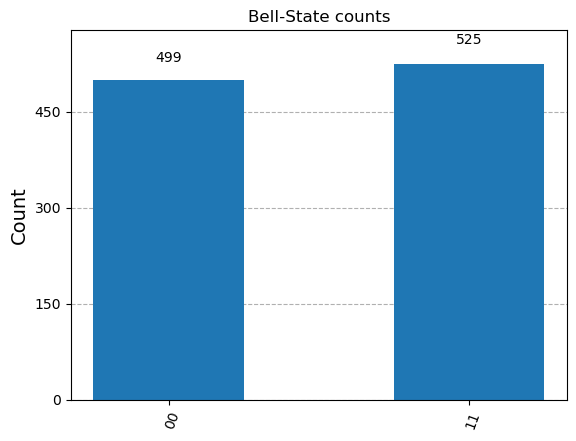

In [9]:
circ.measure_all()
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [14]:
#Question 2

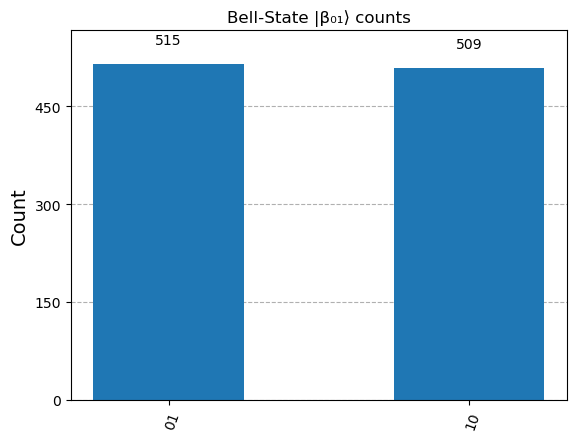

In [15]:
#Bell state |β₀₁⟩ = (1/√2)(|01⟩ + |10⟩)
# Apply X to qubit 1 before creating the Bell state
circ1 = QuantumCircuit(2)
circ1.x(1)  # First apply X to qubit 1
circ1.h(0)  # Then apply H to qubit 0
circ1.cx(0, 1)  # Then apply CNOT
circ1.measure_all()
simulator = AerSimulator()
circ1 = transpile(circ1, simulator)
result1 = simulator.run(circ1).result()
counts1 = result1.get_counts(circ1)
plot_histogram(counts1, title='Bell-State |β₀₁⟩ counts')

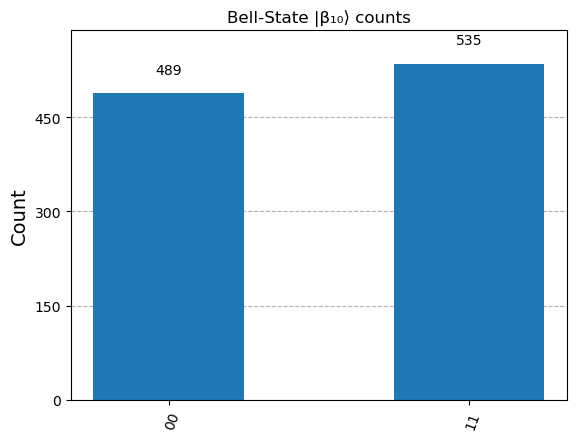

In [16]:
#Bell state |β₁₀⟩ = (1/√2)(|00⟩ - |11⟩)
# Apply X to qubit 0 before creating the Bell state
circ2 = QuantumCircuit(2)
circ2.x(0)  # First apply X to qubit 0
circ2.h(0)  # Then apply H to qubit 0
circ2.cx(0, 1)  # Then apply CNOT
circ2.measure_all()
circ2 = transpile(circ2, simulator)
result2 = simulator.run(circ2).result()
counts2 = result2.get_counts(circ2)
plot_histogram(counts2, title='Bell-State |β₁₀⟩ counts')

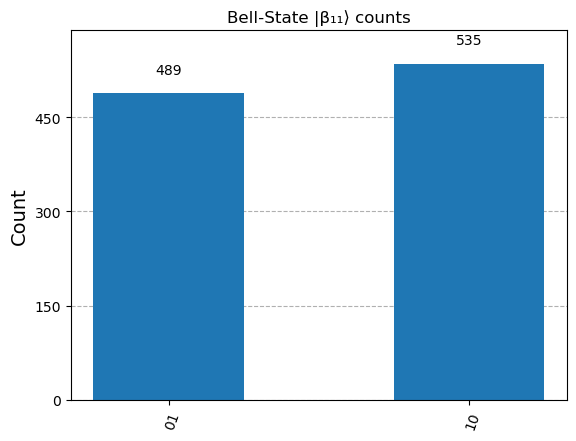

In [17]:
# Create Bell state |β₁₁⟩ = (1/√2)(|01⟩ - |10⟩)
# Apply X to both qubits before creating the Bell state
circ3 = QuantumCircuit(2)
circ3.x(0)  # First apply X to qubit 0
circ3.x(1)  # First apply X to qubit 1
circ3.h(0)  # Then apply H to qubit 0
circ3.cx(0, 1)  # Then apply CNOT
circ3.measure_all()
circ3 = transpile(circ3, simulator)
result3 = simulator.run(circ3).result()
counts3 = result3.get_counts(circ3)
plot_histogram(counts3, title='Bell-State |β₁₁⟩ counts')

In [18]:
# Deutsch-Jozsa (DJ) Algorithm
#Constant Oracle

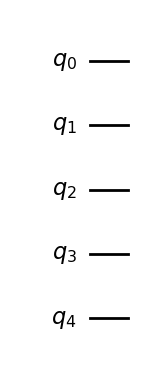

In [21]:
n=4
oracle_qc = QuantumCircuit(n+1)
# First decide what the fixed output of the oracle will be
# (either always 0 or always 1)
output = np.random.randint(2)
if output == 1:
    oracle_qc.x(n)
oracle_qc.draw("mpl")

In [24]:
def const_oracle(n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    # First randomly decide what the fixed output of the
    # oracle will be(either always 0 or always 1)
    output = np.random.randint(2)
    if output == 1:
        oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    # We give our gate a name to display as part of a circuit
    oracle_gate.name = "Cst_Oracle"
    return oracle_gate

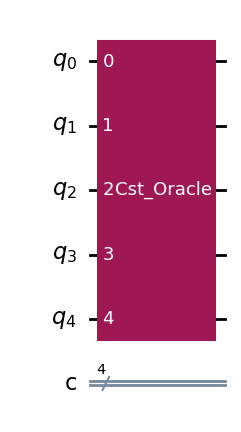

In [25]:
n = 4
dj_circuit = QuantumCircuit(n+1, n)
oracle_gate = const_oracle(n)
dj_circuit.append(oracle_gate, range(n+1))
dj_circuit.draw("mpl")

In [26]:
#Question 3

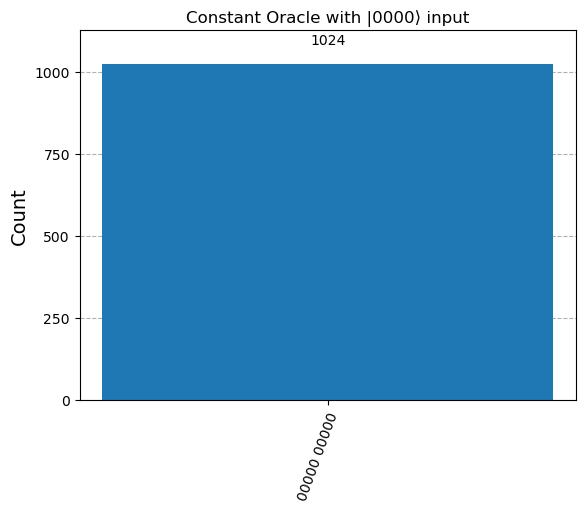

In [27]:
# Test input |0000⟩
test_circuit1 = QuantumCircuit(n+1, n+1)
test_circuit1.append(oracle_gate, range(n+1))
test_circuit1.measure_all()
simulator = AerSimulator()
test_circuit1 = transpile(test_circuit1, simulator)
result1 = simulator.run(test_circuit1).result()
counts1 = result1.get_counts(test_circuit1)
plot_histogram(counts1, title='Constant Oracle with |0000⟩ input')

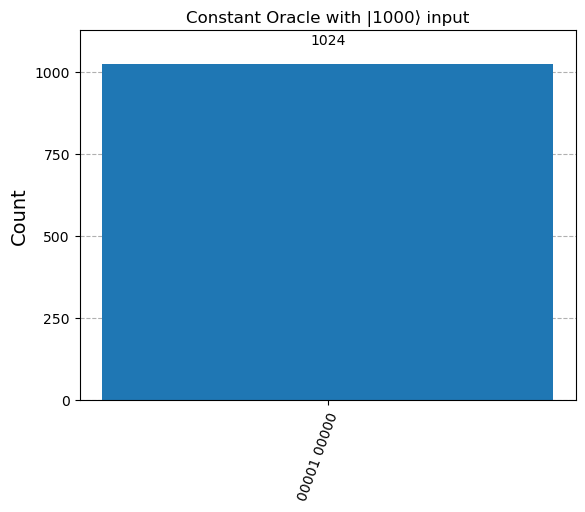

In [28]:
# Test input with qubit 0 flipped
test_circuit2 = QuantumCircuit(n+1, n+1)
test_circuit2.x(0)
test_circuit2.append(oracle_gate, range(n+1))
test_circuit2.measure_all()
test_circuit2 = transpile(test_circuit2, simulator)
result2 = simulator.run(test_circuit2).result()
counts2 = result2.get_counts(test_circuit2)
plot_histogram(counts2, title='Constant Oracle with |1000⟩ input')

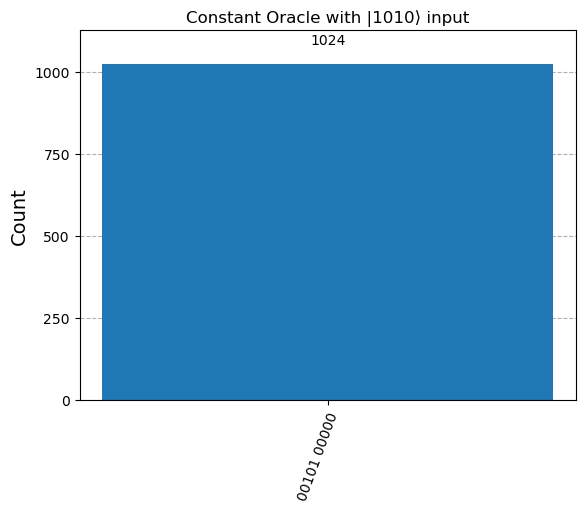

In [29]:
# Test input with qubits 0 and 2 flipped
test_circuit3 = QuantumCircuit(n+1, n+1)
test_circuit3.x(0)
test_circuit3.x(2)
test_circuit3.append(oracle_gate, range(n+1))
test_circuit3.measure_all()
test_circuit3 = transpile(test_circuit3, simulator)
result3 = simulator.run(test_circuit3).result()
counts3 = result3.get_counts(test_circuit3)
plot_histogram(counts3, title='Constant Oracle with |1010⟩ input')

In [35]:
#the output qubit (the last qubit) always has the same value (either always 0 or always 1),
#confirming the oracle is indeed constant.

In [32]:
#Balanced Oracle

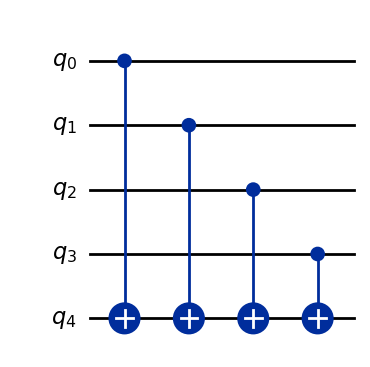

In [39]:
n=4
oracle_qc = QuantumCircuit(n+1)
# Controlled-NOT gates
for qubit in range(n):
    oracle_qc.cx(qubit, n)
oracle_qc.draw("mpl")

In [40]:
#Question4

In [42]:
#Part a)
#With n input qubits, there are 2^n possible binary inputs. The balanced oracle divides these inputs into two equal 
#groups based on the parity (whether the number of 1s is even or odd).

#For any n, there are exactly 2^(n-1) inputs with even parity and 2^(n-1) inputs with odd parity. 

#This is because:
#For each input with even parity, flipping any single bit creates an input with odd parity
#This creates a perfect one-to-one mapping between even and odd parity inputs
#Therefore, half of all possible inputs have even parity and half have odd parity

In [43]:
#Part b)
#If the input has an even number of 1s: The CNOT gates will flip the output qubit an even number of times,
#resulting in no change (it stays in state |0⟩)

#If the input has an odd number of 1s: The CNOT gates will flip the output qubit an odd number of times,
#resulting in state |1⟩

In [44]:
#a random variant of the balanced oracle and convert it to a Qiskit gate

In [45]:
def balanced_oracle(n):
    oracle_qc = QuantumCircuit(n+1)
    # To get a more general randomly chosen balanced oracle,
    # first generate a random number that tells us which
    # inputs to place the X-gates:
    b = np.random.randint(1,2**n)
    # Next, format 'b' as a binary string of length 'n',
    # padded with zeros:
    b_str = format(b, '0'+str(n)+'b')
    # Next, we place the first X-gates. Each digit in our
    # binary string corresponds to a qubit, if the digit is 0
    # we do nothing, if it's 1 apply an X-gate to that qubit:
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    # Controlled-NOT gates
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
    # Place X-gates to put back state
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    oracle_gate = oracle_qc.to_gate()
    # Name to show when we display the circuit:
    oracle_gate.name = "BL_Oracle"
    return oracle_gate

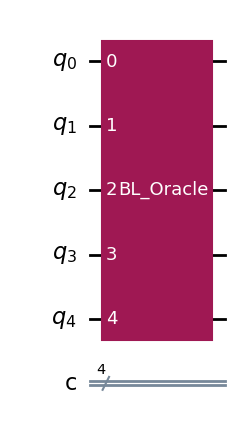

In [46]:
n = 4
oracle_gat = balanced_oracle(n)
dj_circuit = QuantumCircuit(n+1, n)
dj_circuit.append(oracle_gat, range(n+1))
dj_circuit.draw("mpl")

In [47]:
#DJ algorithm circuit

In [48]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit

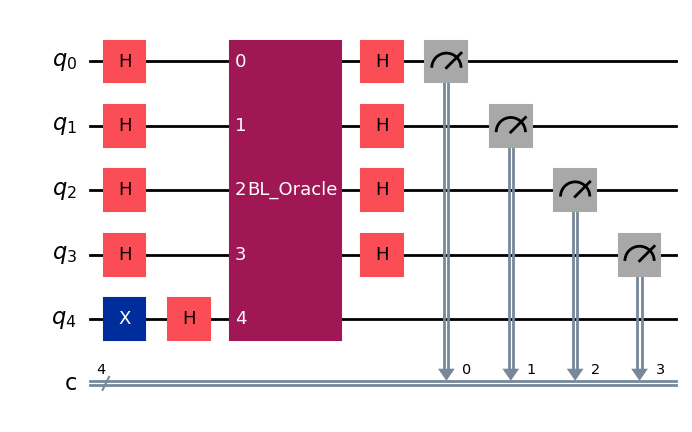

In [49]:
n = 4
dj_circuit = dj_algorithm(balanced_oracle(n), n)
dj_circuit.draw("mpl")

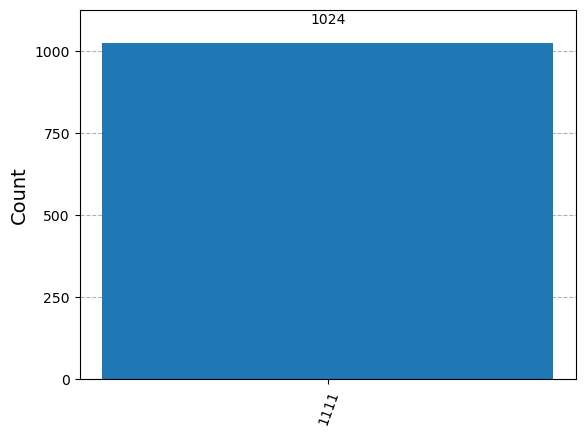

In [50]:
# Transpile for simulator
aer_sim = AerSimulator()
transpiled_dj_circuit = transpile(dj_circuit, simulator)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

In [51]:
#Question 5

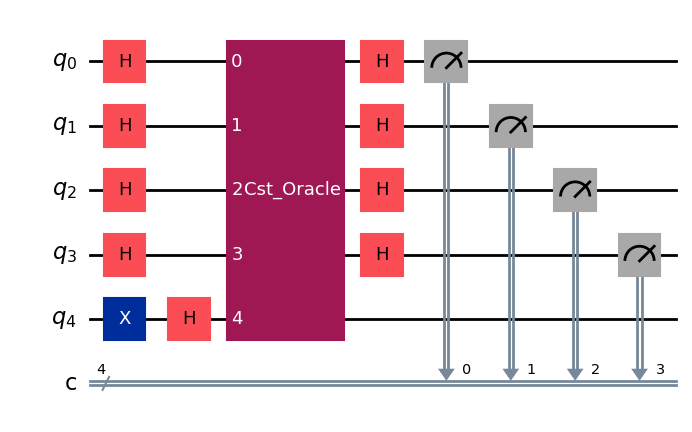

In [52]:
#Part a)
n = 4
const_oracle_gate = const_oracle(n)
dj_circuit = dj_algorithm(const_oracle_gate, n)
dj_circuit.draw("mpl")

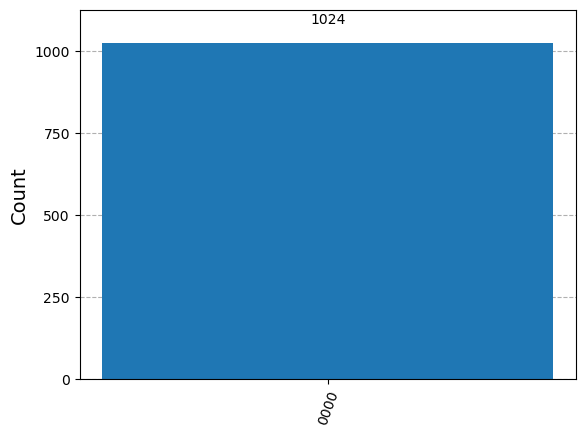

In [54]:
# Transpile and run
aer_sim = AerSimulator()
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

In [55]:
#Part b)
#The X-gate is applied to the (n+1)st qubit to initialize it in state |1⟩ before applying the Hadamard gate. 
#This is necessary because:
#The Deutsch-Jozsa algorithm needs the output qubit to be in a special state called |−⟩.
#To get this |−⟩ state, we need to:
#-Start with |1⟩ (by applying X-gate)
#-Then apply a Hadamard gate
#Without this flip, the algorithm simply wouldn't work correctly. The special |−⟩ state lets the algorithm detect whether our hidden function is constant or balanced in just one evaluation.